In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
pwd

'/Users/qt.min/Desktop/KAGGLE_A/AmazonReviewsAnalysis/Qianti'

In [3]:
review = pd.read_csv('../../amazon-fine-food-reviews/Reviews.csv')
review.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [4]:
review.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [5]:
review.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### correlation between the number of reviews (from single costumer) and mean ratings 

In [6]:
df1 = review[['UserId','Score']]

In [7]:
df1a = df1.groupby(['UserId']).agg({'Score': [np.size, np.mean]})
df1a.columns = ['review_size','review_mean']

In [8]:
df1a.head(5)

,review_size,review_mean
UserId,,
#oc-R103C0QSV1DF5E,1,5.0
#oc-R109MU5OBBZ59U,1,5.0
#oc-R10LFEMQEW6QGZ,1,5.0
#oc-R10LT57ZGIB140,1,3.0
#oc-R10UA029WVWIUI,1,1.0


In [9]:
df1a.describe()

,review_size,review_mean
count,256059.000000,256059.000000
mean,2.220012,4.168984
std,4.443361,1.313261
min,1.000000,1.000000
25%,1.000000,4.000000
50%,1.000000,5.000000
75%,2.000000,5.000000
max,448.000000,5.000000


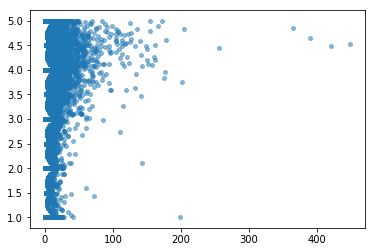

In [10]:
#Distribution of rating times 
plt.scatter(df1a[['review_size']],df1a['review_mean'],alpha=0.5,s=15)

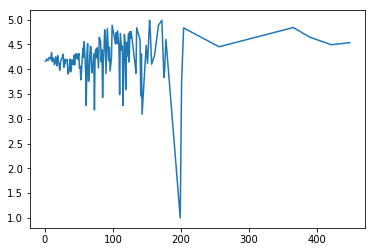

In [11]:
# Average rating scores coresponding to diff total times of ratings 
df1a.columns = ['review_size','review_mean']
df1aa = df1a.groupby(['review_size']).mean()
plt.plot(df1aa,label="...")

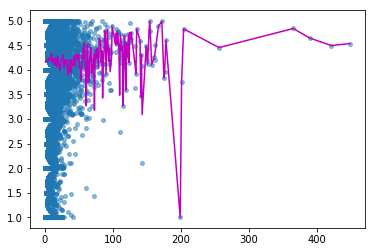

In [12]:
plt.scatter(df1a[['review_size']],df1a['review_mean'],alpha=0.5,s=15)
plt.plot(df1aa, color='m',label="...")

**Most people give ~50 reviews with ~4.0 stars on average :0**

### Ratings distribution 

In [13]:
df2 = review['Score']
df2a = df2.value_counts().sort_index() 

In [14]:
df2a

1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

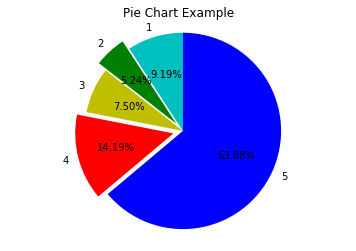

In [15]:
labels = [str(df2a.index[x]) for x in range(5)]
sections = df2a.values

colors = ['c', 'g', 'y', 'r', 'b']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0,0.1,0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()

### Words used in reviews 
- most frequently used in general
- most frequently used with good/bad scores

In [20]:
df3 = review[['Score','Text']]
df3['Text'] = df3['Text'].apply(lambda x: str.split(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df3.head(5)

,Score,Text
0,5,"[I, have, bought, several, of, the, Vitality, ..."
1,1,"[Product, arrived, labeled, as, Jumbo, Salted,..."
2,4,"[This, is, a, confection, that, has, been, aro..."
3,2,"[If, you, are, looking, for, the, secret, ingr..."
4,5,"[Great, taffy, at, a, great, price., There, wa..."


In [ ]:
df3a = df3.groupby(['Score']).sum()

too many words.......

In [26]:
print(df4.isnull().any())

Score      False
Summary     True
dtype: bool


In [20]:
df4 = review[['Score','Summary']]
df4['Summary'] = df4['Summary'].apply(lambda x: str.split(x))

TypeError: descriptor 'split' requires a 'str' object but received a 'float'

In [27]:
print(df4.isnull().any())

Score      False
Summary     True
dtype: bool


In [34]:
df4.where(df4.notnull(), 'na')
df4['Summary'] = df4['Summary'].apply(lambda x: str.split(x))

TypeError: descriptor 'split' requires a 'str' object but received a 'float'